In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
OrigImg ='/content/drive/My Drive/Colab Notebooks/LARP_ASS1/29.jpg'

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

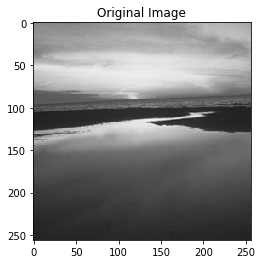

In [0]:
img = mpimg.imread(OrigImg)     
img.shape
gray = rgb2gray(img)
gray=np.matrix(gray)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.title('Original Image')
plt.show()

In [0]:
A=gray


In [0]:
eigvals, eigvecs = np.linalg.eigh(A.T @ A)
Sigma = np.diag(np.sqrt(eigvals[::-1]))
V = eigvecs[:,::-1]
V1=V
U = A @ V @ np.linalg.inv(Sigma)
U1=U

In [0]:
U1=np.matrix(U1)
V1=np.matrix(V1)
type(U1)

numpy.matrix

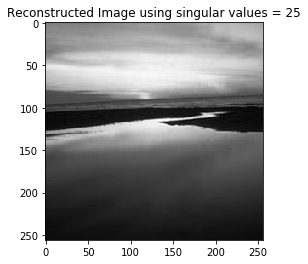

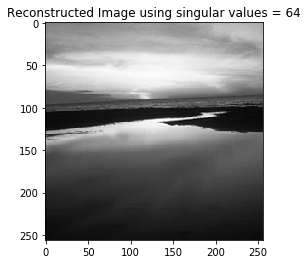

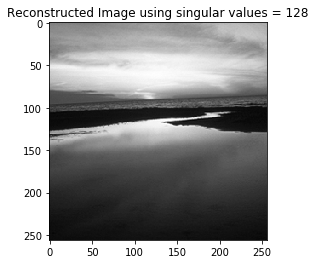

In [0]:
for i in [25, 64, 128]:
  reconImg = U[:,:i]@Sigma[:i,:i]@V[:,:i].T #reconstruction
  plt.imshow(reconImg, cmap='gray')
  title = "Reconstructed Image using singular values = %s" % i
  plt.title(title)
  plt.show()


reconEr 539.5801415106774


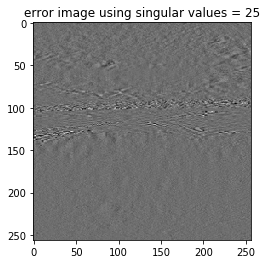

reconEr 286.2003377640093


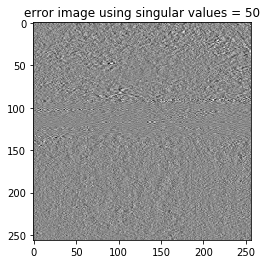

reconEr 228.12478064125028


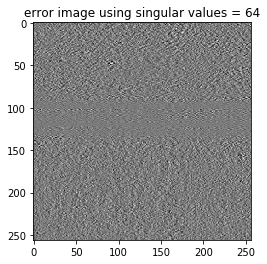

reconEr 143.8028455426026


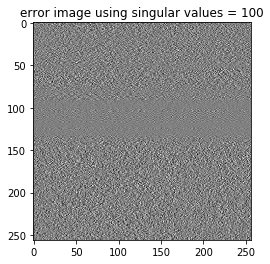

reconEr 99.64852176971172


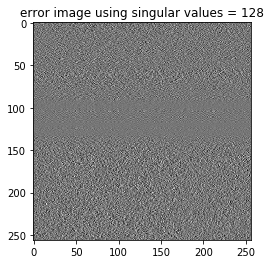

reconEr 25.709042755216657


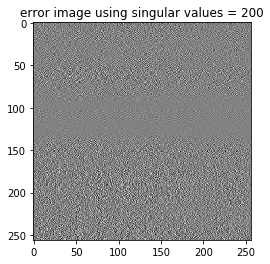

reconEr 0.8725875691656539


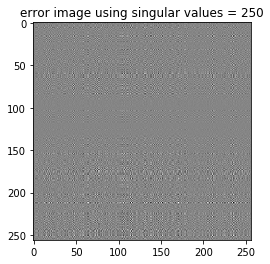

In [0]:
ER=[]
N=[]
j=0
for i in [25,50,64,100,128,200,250]:
  E = U[:,:i]@Sigma[:i,:i]@V[:,:i].T #reconstruction
#   A_pinv=pseudoinv(np.transpose(A))
#   A_approx=A_pinv@E
  error=gray-E
  reconErr=np.linalg.norm(error,'fro')
  ER.append(reconErr)
  N.append(i)
#   j=j+1
  print('reconEr',reconErr)
#   plt.imshow(A_approx, cmap='gray')
#   title = "Reconstructed Image using singular values = %s" % i
  plt.imshow(error, cmap='gray')
  title = "error image using singular values = %s" % i
  plt.title(title)
  plt.show()

Text(0, 0.5, 'Error')

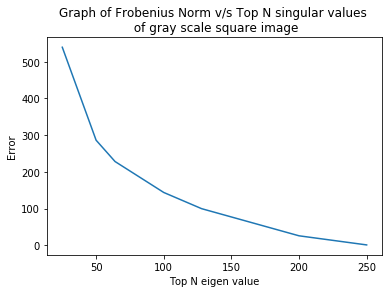

In [0]:
plt.plot(N, ER)
plt.title('Graph of Frobenius Norm v/s Top N singular values \n of gray scale square image')
plt.xlabel('Top N eigen value')
plt.ylabel('Error')    
  
     

In [0]:
randi=random.sample(range(0, 250), 25)
U2=[]
D=[]
V2=[]
type(U1)
# index=0
for i in randi:
  tempU1=np.squeeze(np.array(U1[:,i]))
  tempV1=np.squeeze(np.array(V1[:,i]))
  tempD=(Sigma[i,i])
  U2.append(tempU1)
  V2.append(tempV1)
  D.append(tempD)
print(tempU1.shape)


In [0]:
U2=np.transpose(np.array(U2))
# U2=np.array(U2)
V2=np.array(V2)
D=np.array(D)
D=np.diag(D)


In [0]:
print(U2.shape)
print(D.shape)
print(V2.shape)

(256, 25)
(25, 25)
(25, 256)


In [0]:
A_rand= U2@D@V2
A_rand.shape

(256, 256)

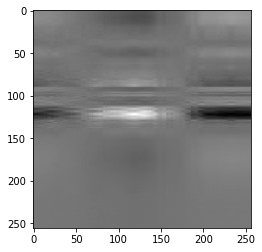

In [0]:
plt.imshow(A_rand, cmap='gray')

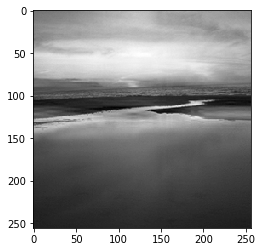

In [0]:
S=A-A_rand
plt.imshow(S, cmap='gray')